In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the McDonald's dataset from a CSV file
df = pd.read_csv("mcdonalds.csv")

In [7]:
# Print the dimensions of the dataset
print(df.shape)

(1453, 15)


In [8]:
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [9]:
# Checking for null data --> No null data
df_info = df.info()
df_isnull = df.isnull().sum()

# Checking the count of variables
gender_counts = df['Gender'].value_counts()
frequency_counts = df['VisitFrequency'].value_counts()
like_counts = df['Like'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


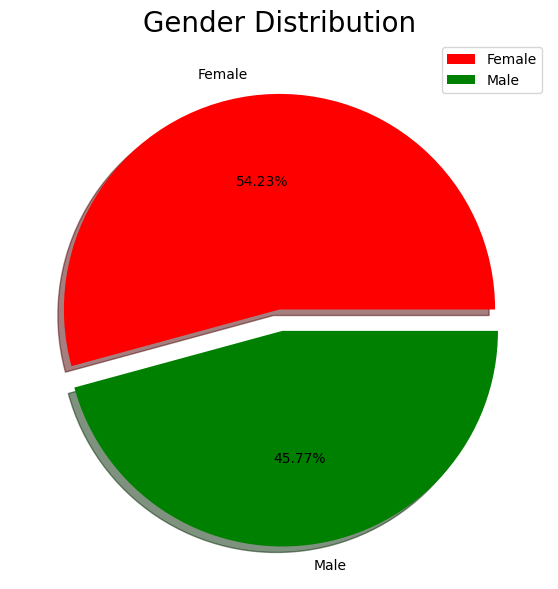

In [10]:
# Gender
gender_labels = ['Female', 'Male']
gender_sizes = df['Gender'].value_counts()
gender_colors = ['red', 'green']
gender_explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(gender_sizes, colors=gender_colors, explode=gender_explode, labels=gender_labels, shadow=True, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

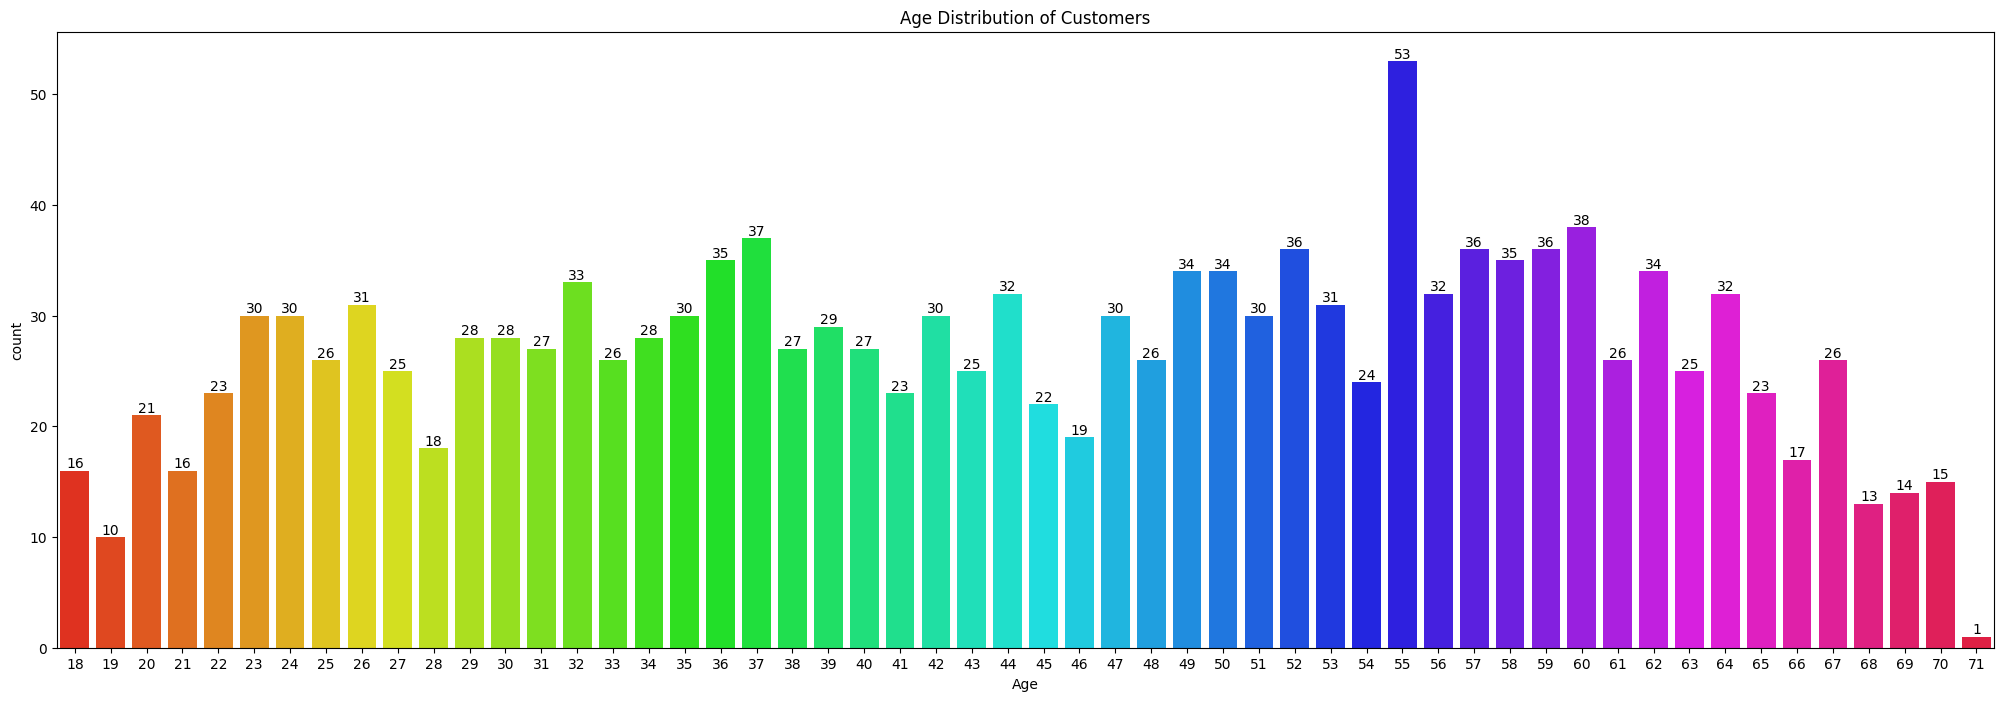

In [11]:
# Age
plt.rcParams['figure.figsize'] = (25, 8)
age_plot = sns.countplot(x=df['Age'], palette='hsv')
age_plot.bar_label(age_plot.containers[0])
plt.title('Age Distribution of Customers')
plt.show()


/tmp/ipykernel_31/3239555813.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age", data=df, orient="v", height=5, aspect=2, palette="Set2", kind="swarm")


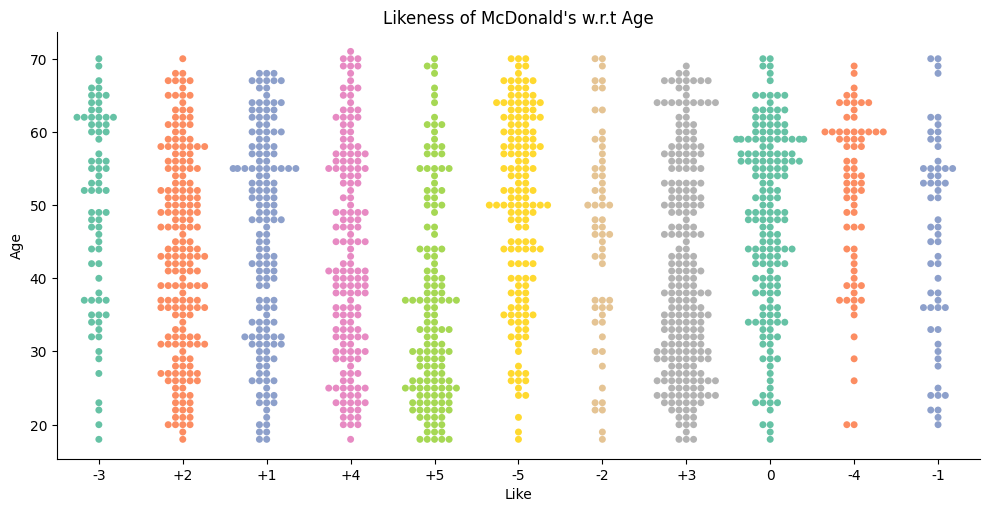

In [12]:
# Renaming the "Like" category for convenience
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Like
sns.catplot(x="Like", y="Age", data=df, orient="v", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('Likeness of McDonald\'s w.r.t Age')
plt.show()

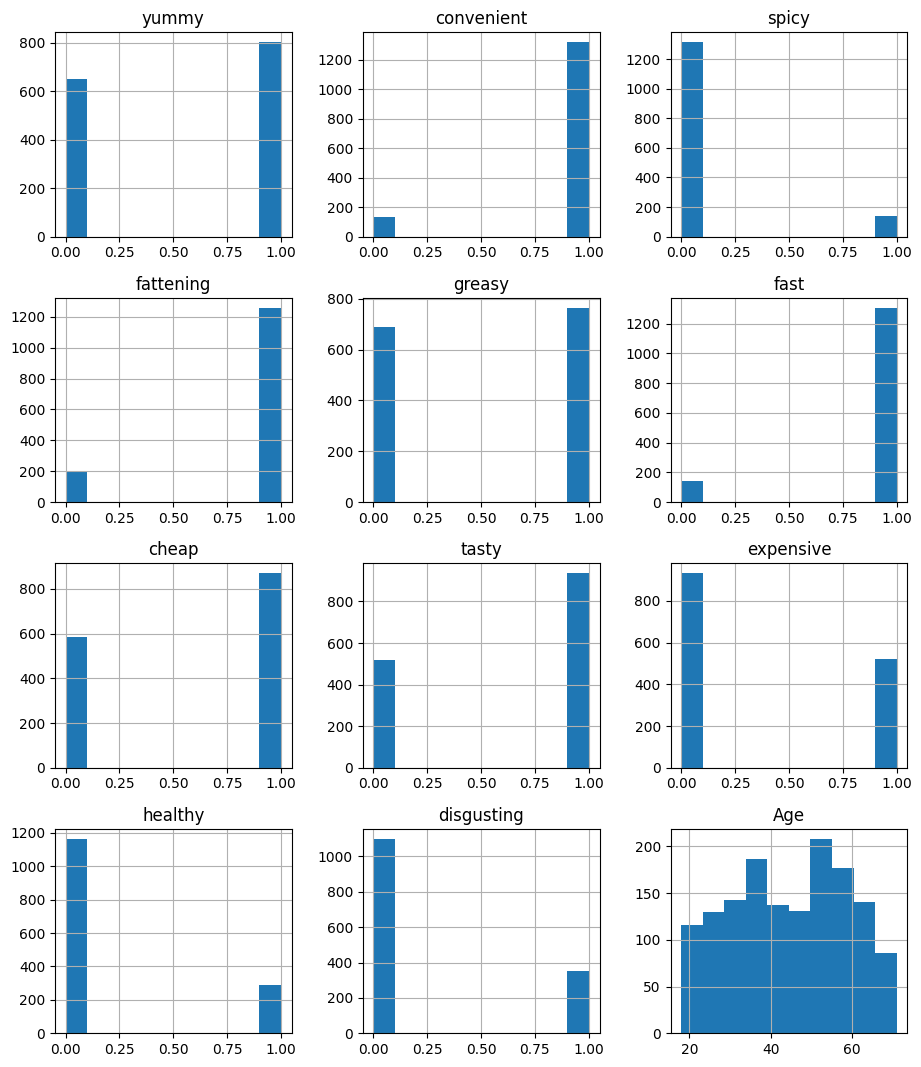

In [13]:
# Label encoding for categorical variables (Converting 11 cols with yes/no)

from sklearn.preprocessing import LabelEncoder

def label_encoding(column):
    df[column] = LabelEncoder().fit_transform(df[column])

categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
              'tasty', 'expensive', 'healthy', 'disgusting']

for category in categories:
    label_encoding(category)

# Histogram of each attribute
plt.rcParams['figure.figsize'] = (11, 13)
df.hist()
plt.show()


In [14]:
df_eleven = df.loc[:, categories]
df_eleven


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [15]:
# Considering only the 11 cols and converting it into an array
x = df.loc[:, categories].values

# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)

pca_variances = pca.explained_variance_ratio_
pca_cumulative_variances = np.cumsum(pca_variances)


In [17]:
# Correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame(data=loadings.T, columns=pc_list)
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


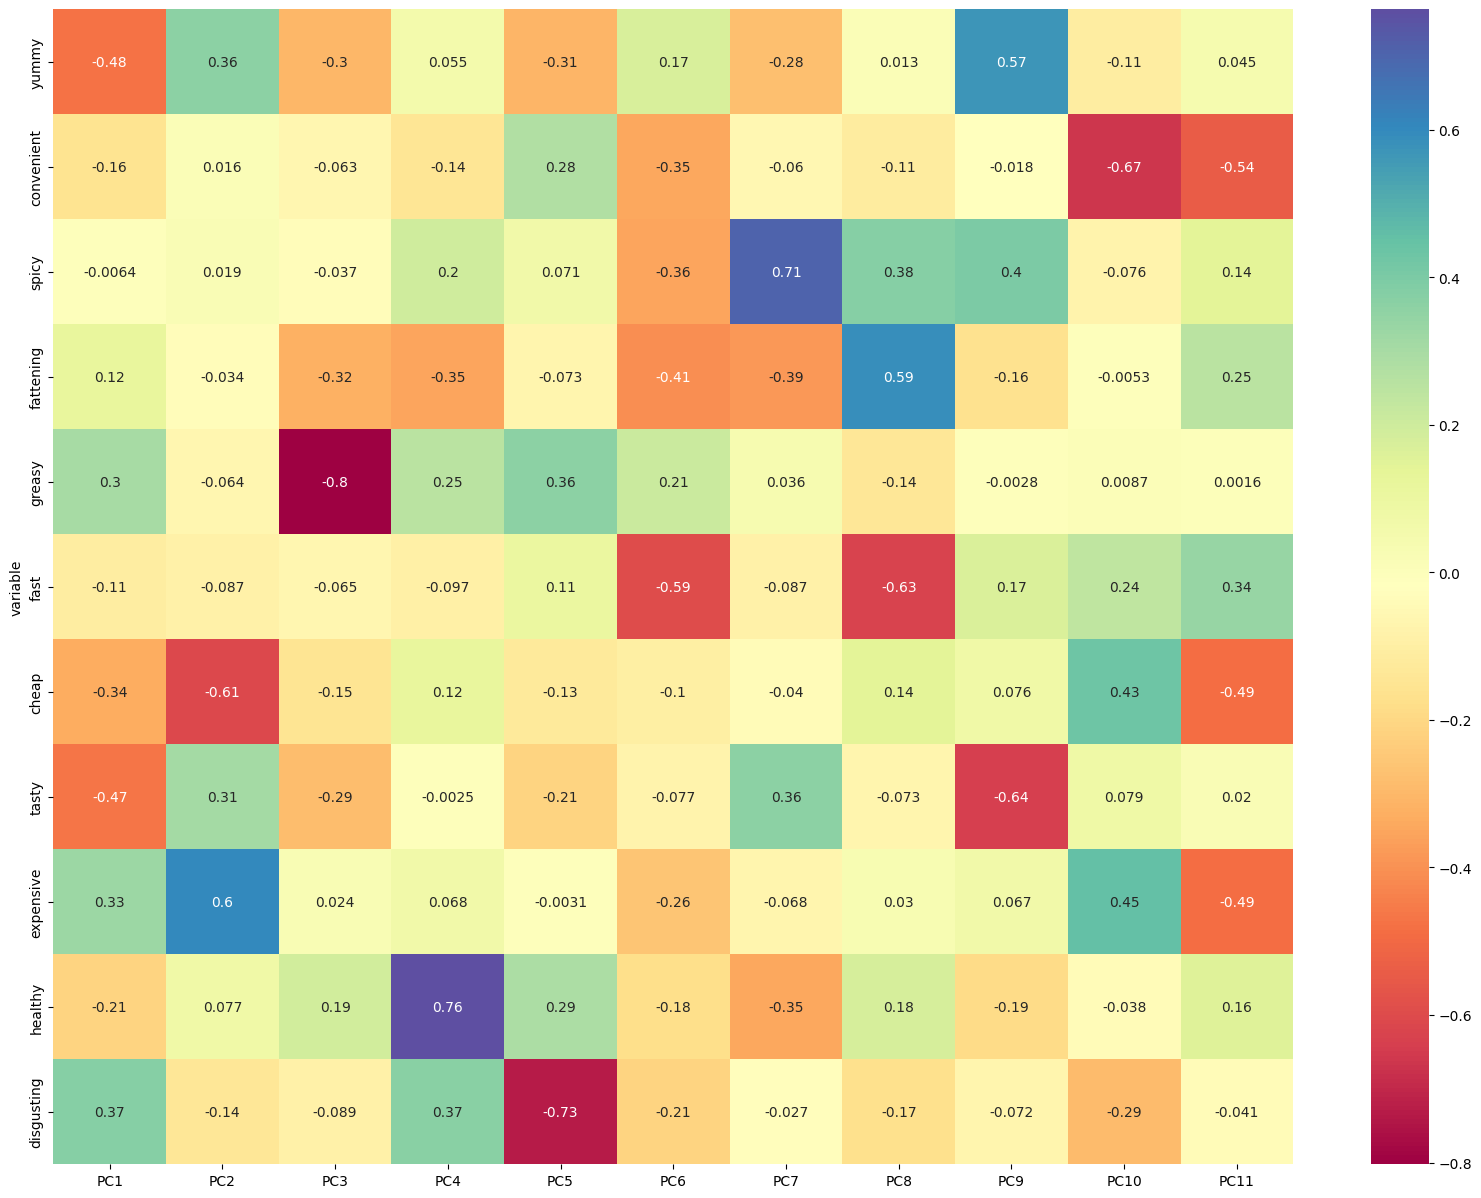

In [19]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20, 15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

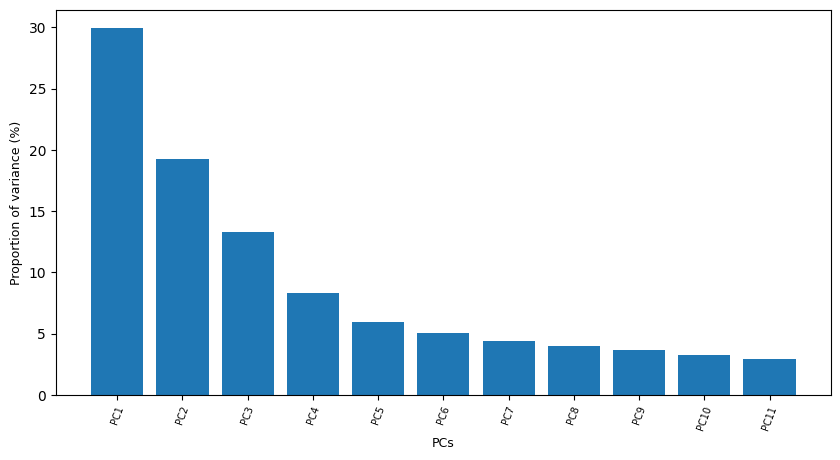

In [20]:
#Scree plot (Elbow test) - PCA
from bioinfokit.visuz import cluster

cluster.screeplot(obj=[pc_list, pca_variances], show=True, dim=(10, 5))

In [21]:
#Get PC scores
pca_scores = PCA().fit_transform(x)

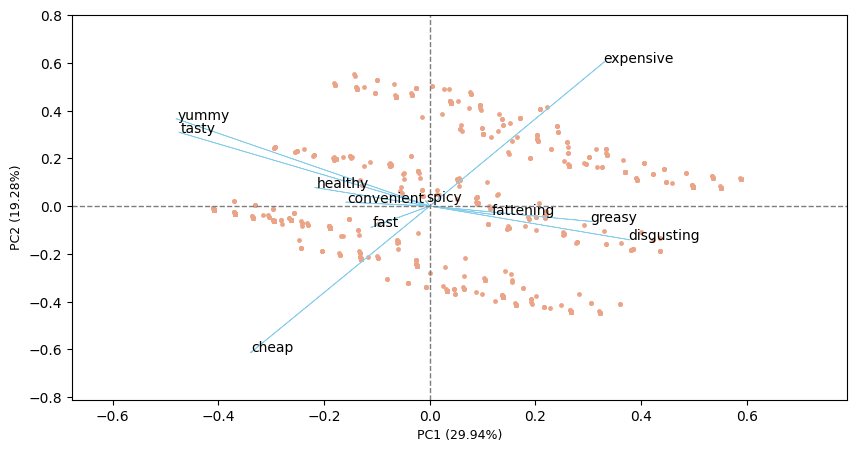

In [22]:
#Get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
var1=round(pca_variances[0] * 100, 2), var2=round(pca_variances[1] * 100, 2),
show=True, dim=(10, 5))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

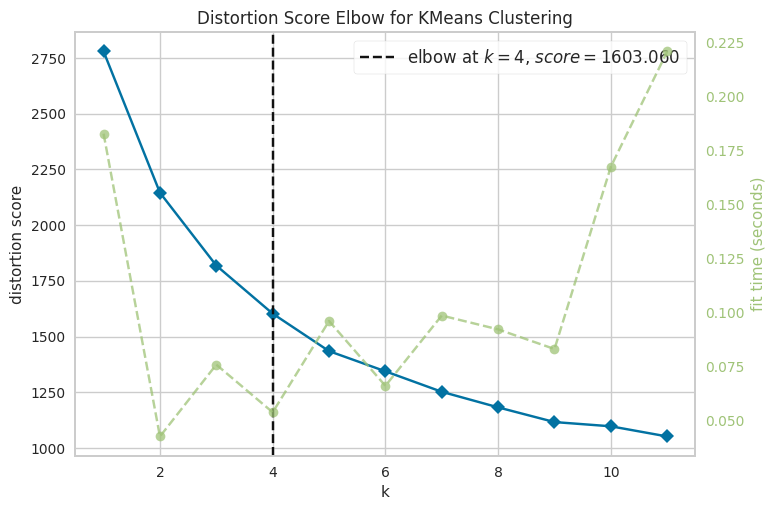

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#Extracting segments using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(df_eleven)
visualizer.show()

In [24]:
#K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
#To see each cluster size
from collections import Counter

cluster_sizes = Counter(kmeans.labels_)

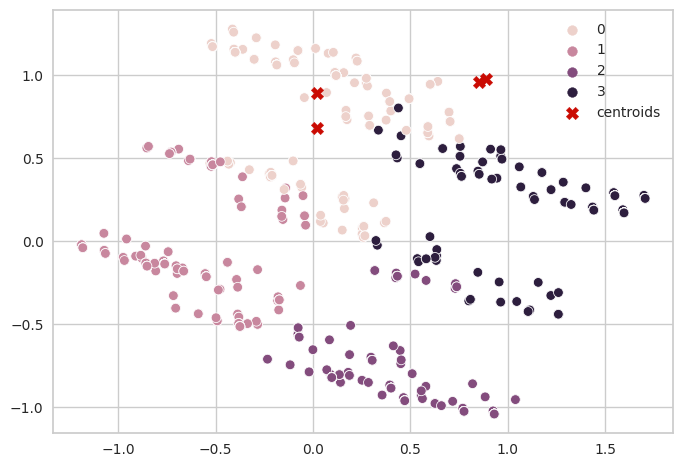

In [29]:
# Visualizing clusters
sns.scatterplot(data=pca_scores, x=pc[:, 0], y=pc[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


In [30]:
#Describing segments
from statsmodels.graphics.mosaicplot import mosaic

crosstab = pd.crosstab(df['cluster_num'], df['Like'])

In [31]:
#Reordering columns
crosstab = crosstab[['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5']]

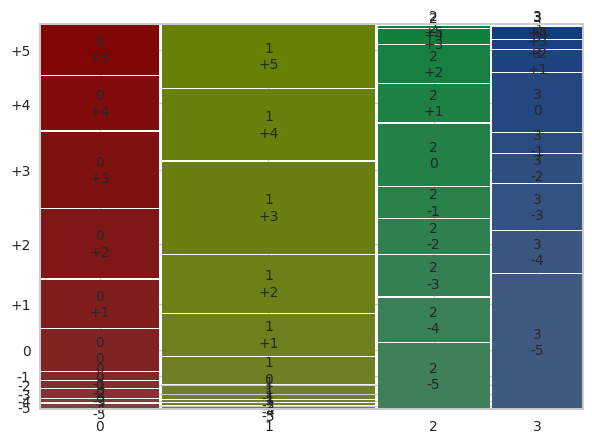

In [32]:
#Mosaic plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()

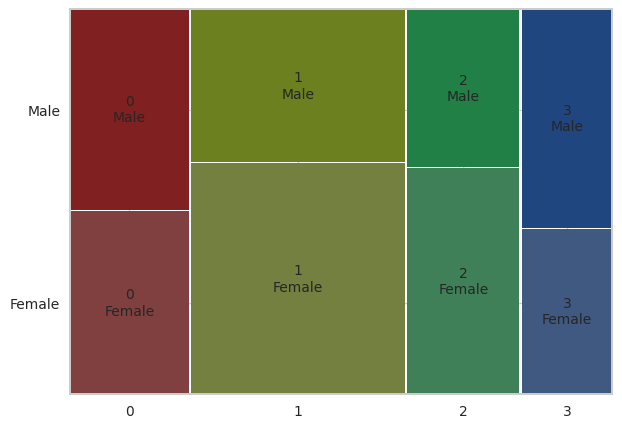

In [33]:
#Mosaic plot for Gender vs Segment
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'])

plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot: xlabel='cluster_num', ylabel='Age'>

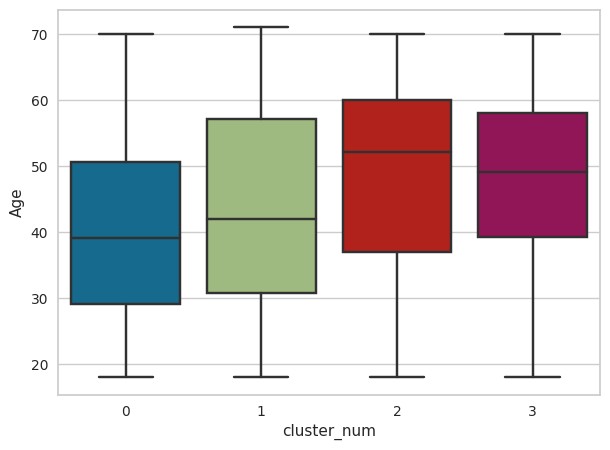

In [34]:
#Box plot for age
sns.boxplot(x="cluster_num", y="Age", data=df)

In [35]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

In [36]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
like = df.groupby('cluster_num')['Like'].mean()
like = like.to_frame().reset_index()

In [37]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
gender = df.groupby('cluster_num')['Gender'].mean()
gender = gender.to_frame().reset_index()

segment = gender.merge(like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

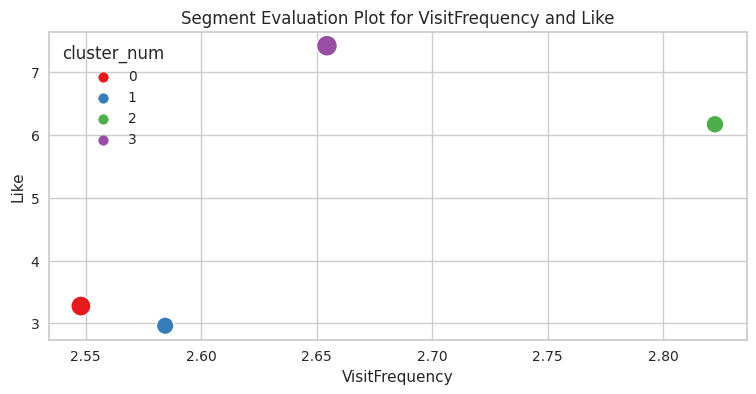

In [39]:
#Target segments
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=segment['Gender']*400, hue=segment['cluster_num'], palette='Set1')
plt.title("Segment Evaluation Plot for VisitFrequency and Like")
plt.show()